<a href="https://colab.research.google.com/github/lkw0820/big_data_final/blob/master/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

날짜별 온도별로 모기 밀집도 보여주기
애니매이션 넣어서

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (20.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


Text(0, 0.5, '밀집도')

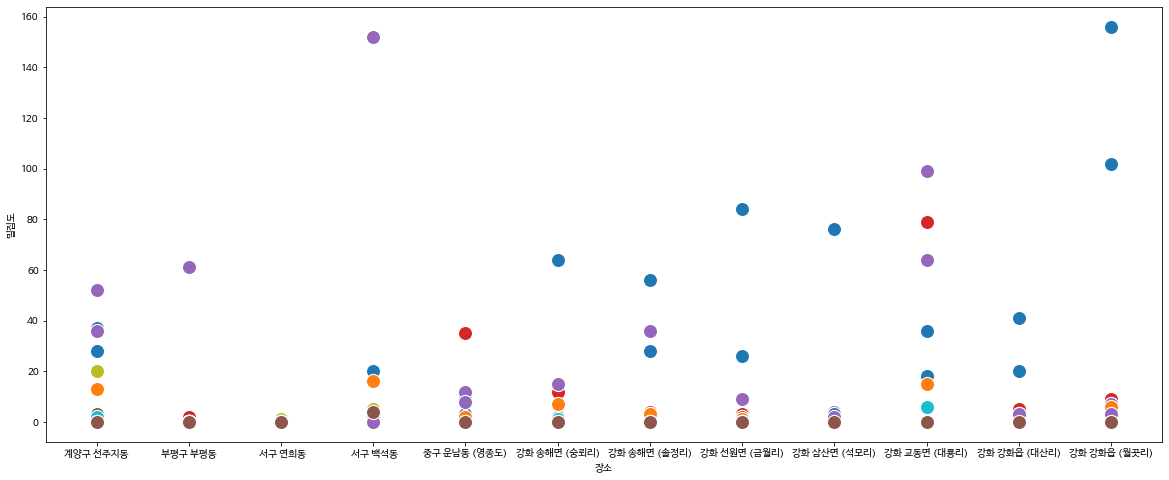

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

df = pd.read_csv('/content/인천광역시_보건환경연구원-모기밀도조사_20211231.csv', encoding = 'CP949', header=0)
#print(df)

#정렬

dfd=df.groupby(['연중주수'])
dfd.dtypes
df4=dfd.get_group('38주')

name=list(df4.columns.values)[4:]

#sns.set(rc={'figure.figsize':(20,8)})
fig, ax = plt.subplots(figsize=(20,8))
for i in name:
  sns.scatterplot(data=df4, x='장소',y=i, s=200)

ax.set_ylabel('밀집도')